# Photometric Deflectometry
Following hardware setups are required prior to capture:
- Camera
- Screen Projection (Monitor)

Calibration Sessions:
- Camera Intrinsic Calibration
- Geometric Calibration (Location of Monitor w.r.t. Camera)

## 0. Import Libraries

In [1]:
from hardware.camera import *
from hardware.projection import *
from hardware.pattern import *
from reconstruction.gradient_reconstruction import *
from calibration.intrinsic_calibration import *
from calibration.geometric_calibration import *
from calibration.capture_verification import *
from reconstruction.pmd_reconstruction import *

import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets

from screeninfo import get_monitors

%load_ext autoreload
%autoreload 2

## 1. Capture Verification

- Get projection screen resolution (manual in here, assume external monitor not connected)
- Geometric Calibration Capture Detect 8 Aruco Markers
- Deflectometry Capture Verify Overexposure

In [2]:
# define projection screen resolution: tuple tesolution of display/screen in pixels (Width, Height)
resolution = (1080, 1920)
if resolution[0] < resolution[1]:
    resolution = (resolution[1], resolution[0])

In [3]:
geo_calib_img = './data/capture_img/calib.tif'
verify_mirror_aruco(geo_calib_img) # verify if all 8 aruco markers are being detected or not

8 Aruco markers are detected!


Max pixel value in ./data/convex/period_1/capture_0.tif: 210
Max pixel value in ./data/convex/period_1/capture_1.tif: 166
Max pixel value in ./data/convex/period_1/capture_2.tif: 138
Max pixel value in ./data/convex/period_1/capture_3.tif: 187
Max pixel value in ./data/convex/period_1/capture_4.tif: 158
Max pixel value in ./data/convex/period_1/capture_5.tif: 210
Max pixel value in ./data/convex/period_1/capture_6.tif: 161
Max pixel value in ./data/convex/period_1/capture_7.tif: 61
Global Max: 210 | Global Min: 61


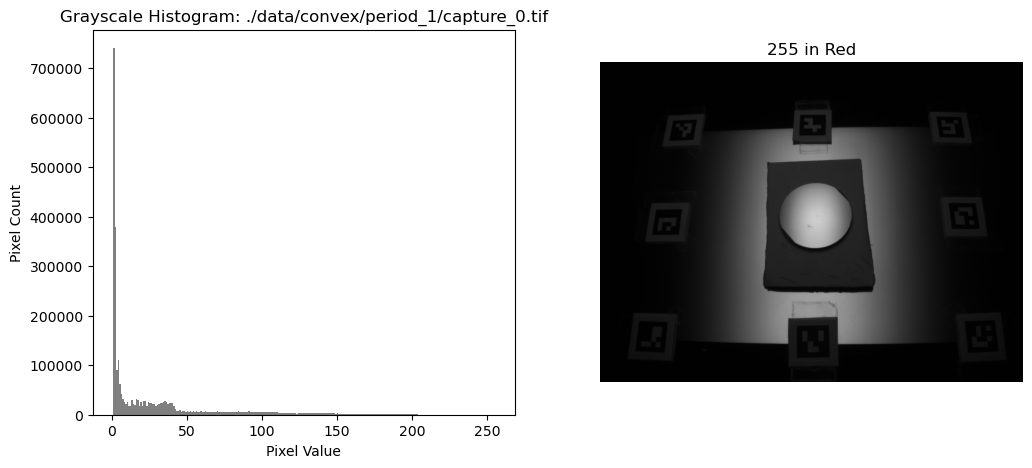

Max pixel value in ./data/convex/period_2/capture_0.tif: 171
Max pixel value in ./data/convex/period_2/capture_1.tif: 205
Max pixel value in ./data/convex/period_2/capture_2.tif: 207
Max pixel value in ./data/convex/period_2/capture_3.tif: 190
Max pixel value in ./data/convex/period_2/capture_4.tif: 207
Max pixel value in ./data/convex/period_2/capture_5.tif: 188
Max pixel value in ./data/convex/period_2/capture_6.tif: 156
Max pixel value in ./data/convex/period_2/capture_7.tif: 189
Global Max: 207 | Global Min: 156


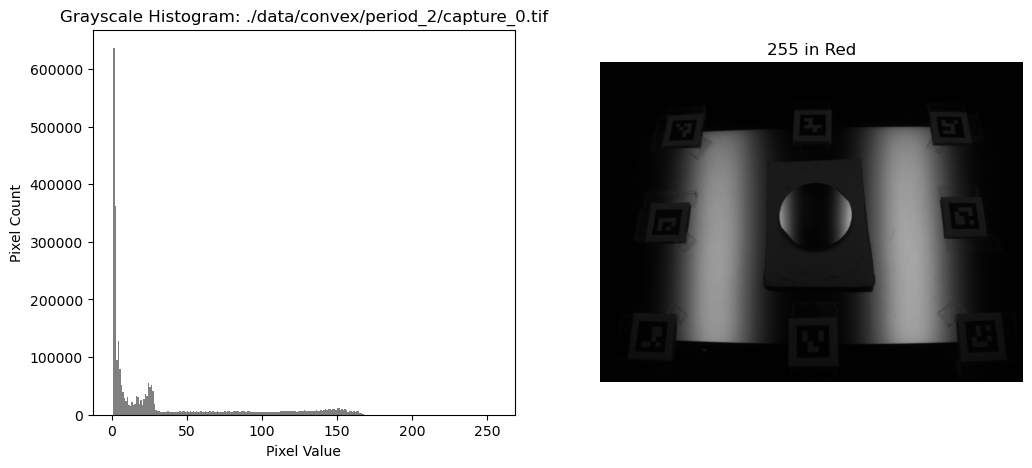

Max pixel value in ./data/convex/period_4/capture_0.tif: 205
Max pixel value in ./data/convex/period_4/capture_1.tif: 207
Max pixel value in ./data/convex/period_4/capture_2.tif: 205
Max pixel value in ./data/convex/period_4/capture_3.tif: 198
Max pixel value in ./data/convex/period_4/capture_4.tif: 186
Max pixel value in ./data/convex/period_4/capture_5.tif: 201
Max pixel value in ./data/convex/period_4/capture_6.tif: 206
Max pixel value in ./data/convex/period_4/capture_7.tif: 198
Global Max: 207 | Global Min: 186


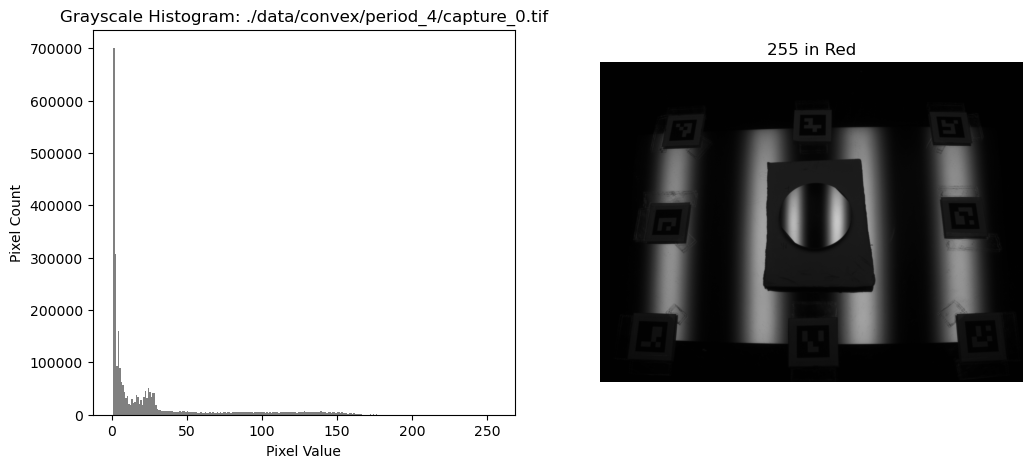

Max pixel value in ./data/convex/period_8/capture_0.tif: 205
Max pixel value in ./data/convex/period_8/capture_1.tif: 204
Max pixel value in ./data/convex/period_8/capture_2.tif: 205
Max pixel value in ./data/convex/period_8/capture_3.tif: 203
Max pixel value in ./data/convex/period_8/capture_4.tif: 199
Max pixel value in ./data/convex/period_8/capture_5.tif: 203
Max pixel value in ./data/convex/period_8/capture_6.tif: 204
Max pixel value in ./data/convex/period_8/capture_7.tif: 200
Global Max: 205 | Global Min: 199


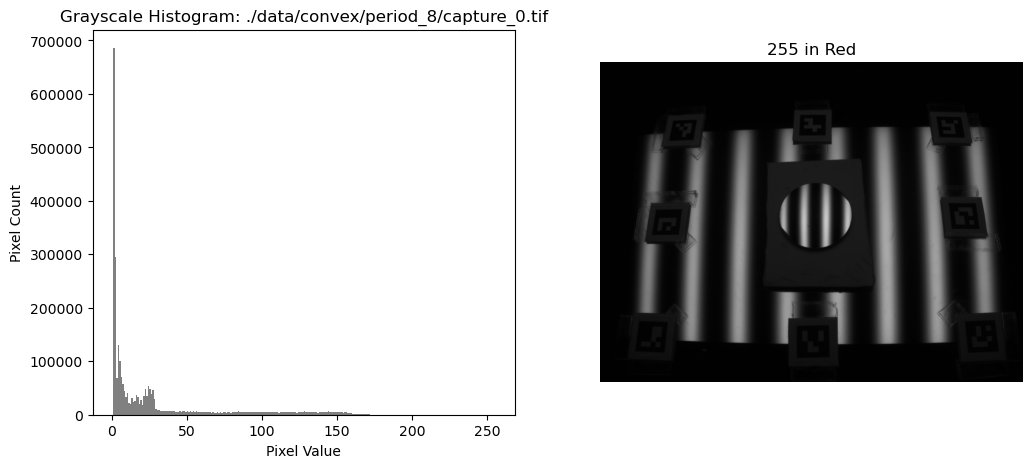

Max pixel value in ./data/convex/period_16/capture_0.tif: 201
Max pixel value in ./data/convex/period_16/capture_1.tif: 201
Max pixel value in ./data/convex/period_16/capture_2.tif: 200
Max pixel value in ./data/convex/period_16/capture_3.tif: 201
Max pixel value in ./data/convex/period_16/capture_4.tif: 199
Max pixel value in ./data/convex/period_16/capture_5.tif: 201
Max pixel value in ./data/convex/period_16/capture_6.tif: 199
Max pixel value in ./data/convex/period_16/capture_7.tif: 198
Global Max: 201 | Global Min: 198


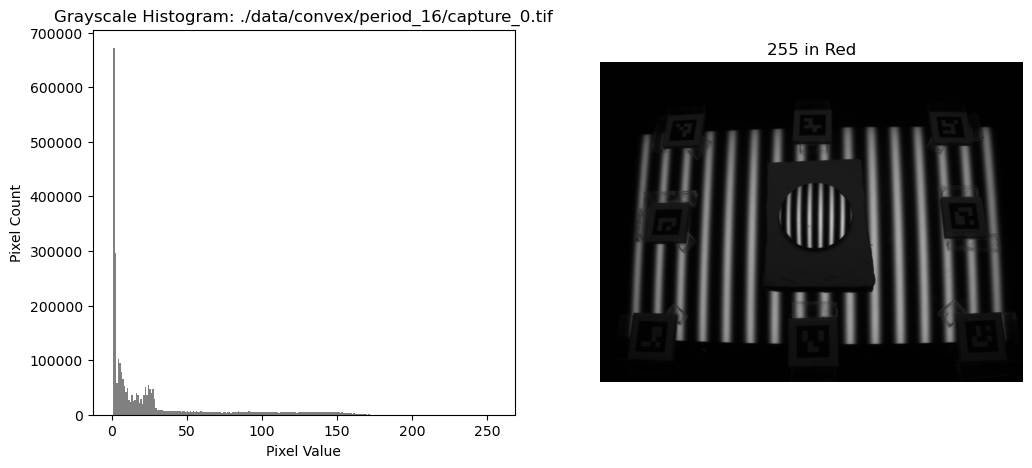

In [4]:
capture_folder = './data/convex'
verify_overexposure(capture_folder) # capture verification

## 4. Intrinsic Calibration
- dict_aruco: dictionary (eg. DICT_4X4_250 means the dictionary is composed of 250 markers and a marker size of 4x4 bits.)
- sqWidth: number of squares in one row (checker + aruco)
- sqHeight: number of squares in one column (checker + aruco)
- checkerSquareSize: measured checker size （side length） in meter
- markerSquareSize: measured aruco marker size （side length） in meter

In [5]:
# initialize intrinsic calibration
intrinsic_calib = IntrinsicCalibration(dict_aruco=cv2.aruco.DICT_4X4_250, sqWidth=10, sqHeight=7, checkerSquareSize=0.020, markerSquareSize=0.016)

intrinsic_calib.calibration(imgFolder="./data/capture_intrinsic/", imgPattern="*.tif") # intrinsic calibration
intrinsic_calib.undistort(imgFolder="./data/capture_geometric/", imgPattern="*.tif") # undistort other imgs based on intrinsic calibration

  0%|          | 0/1 [00:00<?, ?it/s]

NumImg: 15
Rep Error: 0.2943185415922751
Camera Matrix: [[2.04997449e+03 0.00000000e+00 9.77383873e+02]
 [0.00000000e+00 2.04753413e+03 7.21101837e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


## 5. Geometric Calibration

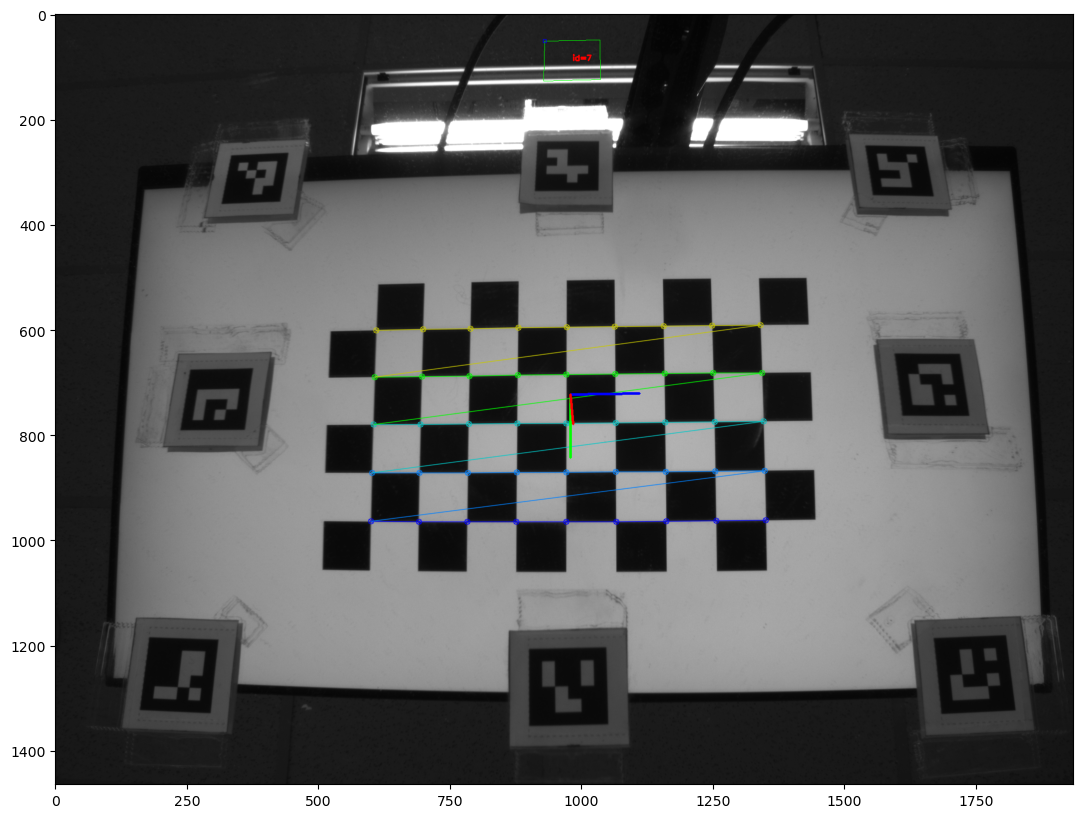

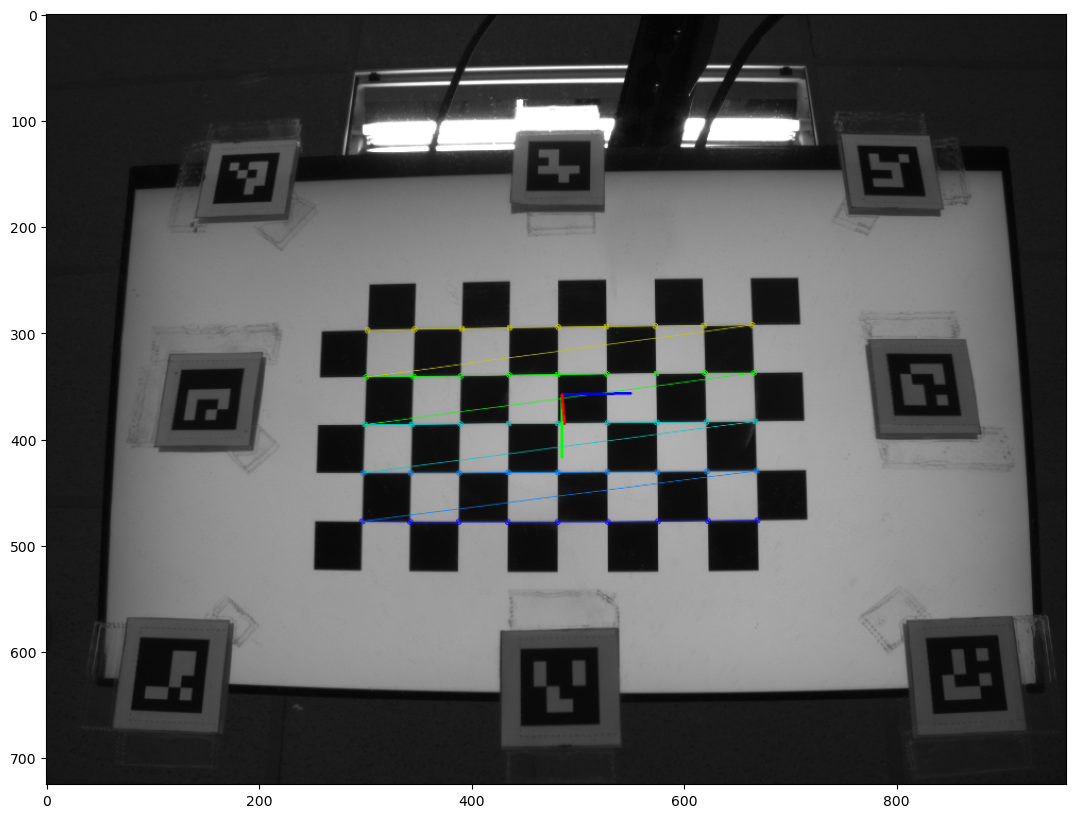

[[-0.00214736]
 [ 0.01683568]
 [ 0.59926972]]
rC2S: [[ 0.99961724  0.00764955 -0.02658667]
 [ 0.02409306 -0.71304649  0.70070267]
 [ 0.01359747  0.70107503  0.71295787]]
tC2S: [ 0.02816489 -0.25089805  0.05893943]


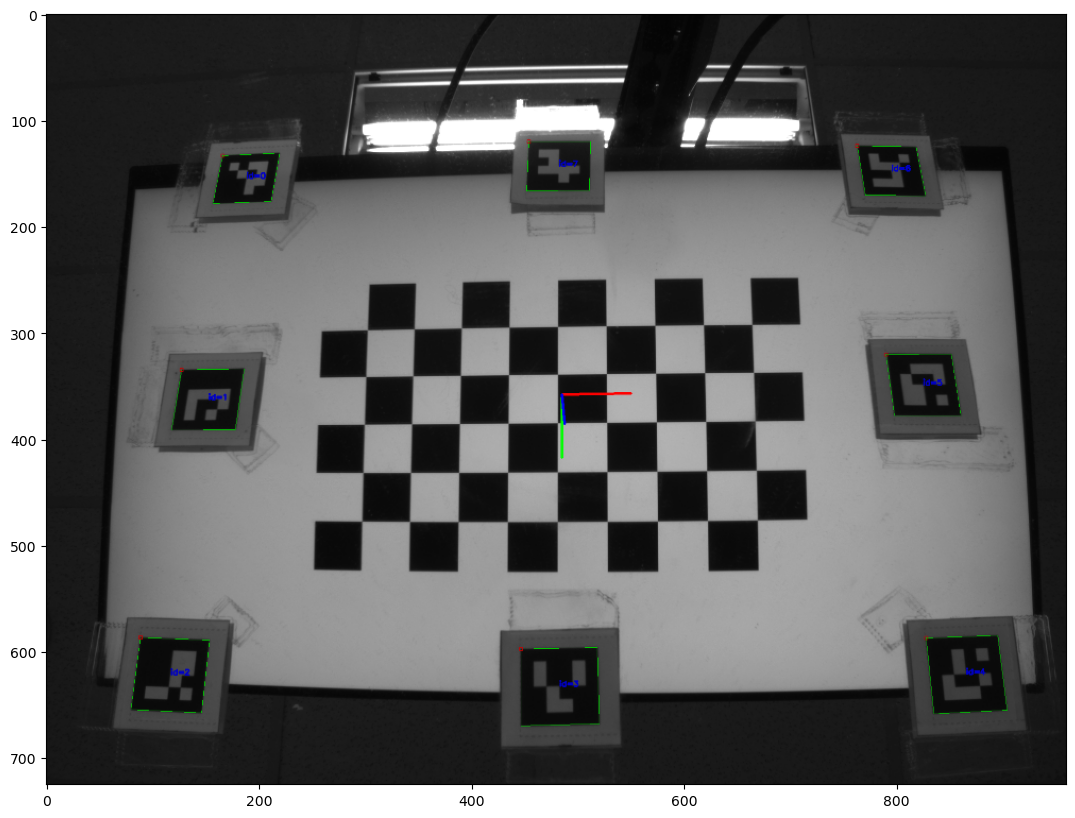

cam z axis in world coor:  [-0.03769817 -0.45453462  0.88993097]
cam zero point in world coor:  [ 0.01157649  0.1425133  -0.27976412]
display z axis in world coor:  [-0.02282505  0.30032559  0.95356361]
display zero in world coor:  [-0.01338947 -0.11486895 -0.26110863]


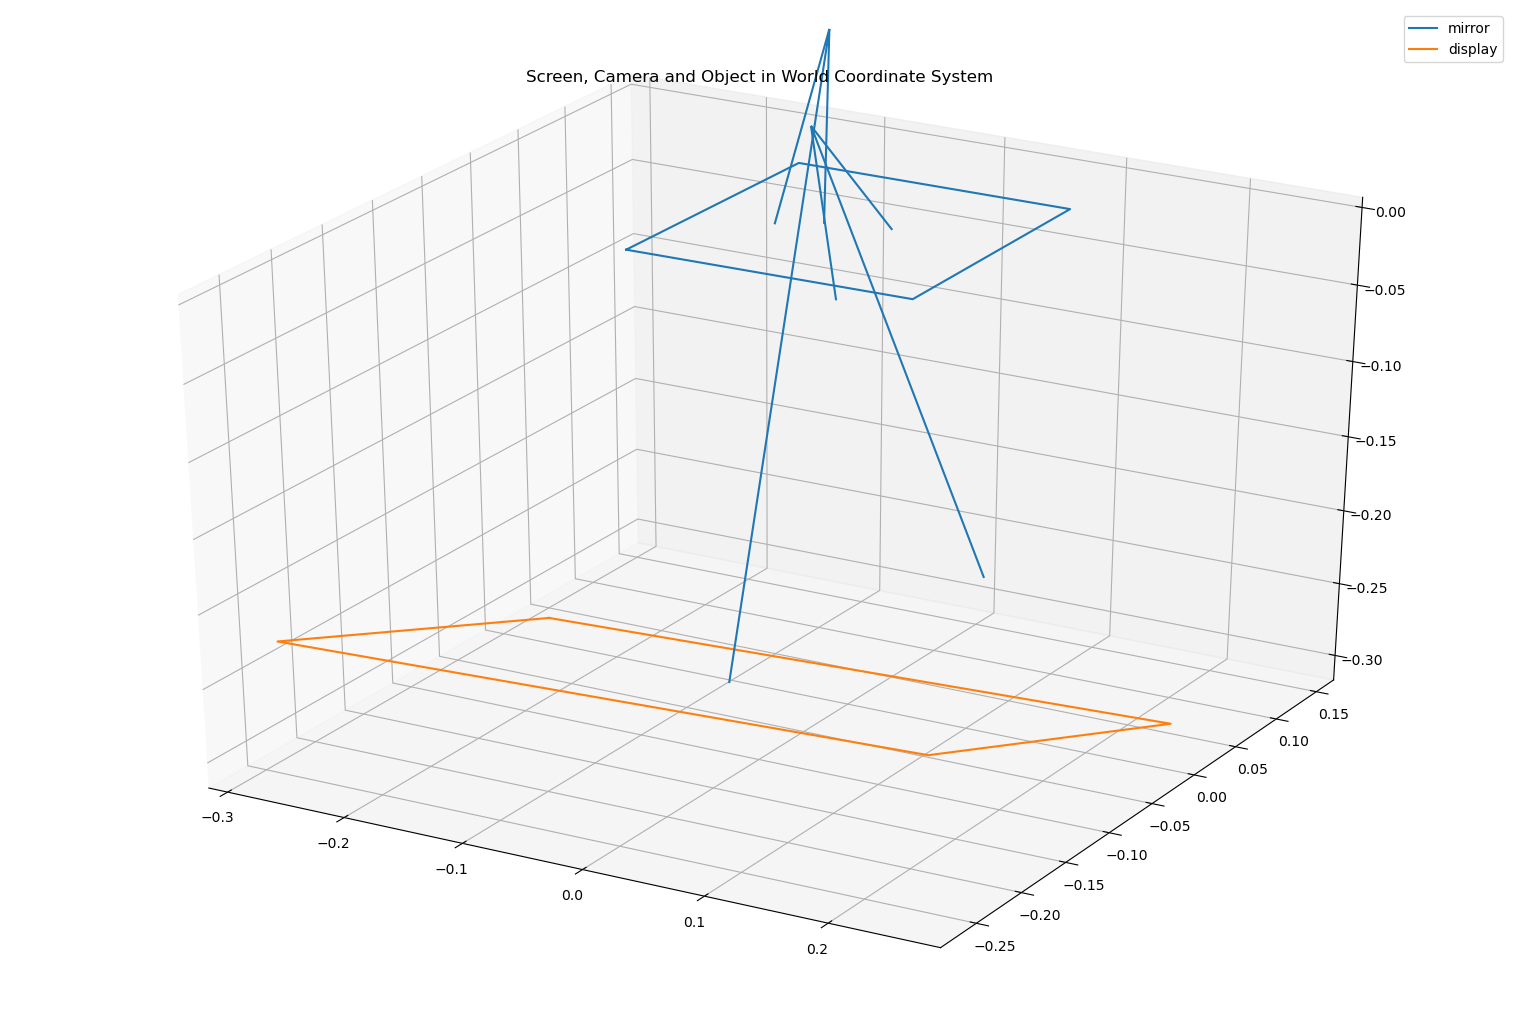

In [6]:
# half length and width of mirror, -0.005 represents that the outer corner of marker is 5mm blank edge, which needs to be distracted.
half_length = 0.245 / 2 -0.005 # 24.5cm
half_height = 0.20 / 2 -0.005 # 20cm
marker_size = 0.02 # 20.45mm

# Checker Pattern(horizontal square count -1, vertical square count -1) project on display
checker_col_row = (9, 5) # number of row and cols generated for chessboard display, -1 for each

# display scale factor, which is the ratio of single checker square length between metric and pixel unit.
# for example, if the length of a checke square on display in 65mm, and it takes 60 pixel in screen, so the ratio is 0.065/60.
displayScaleFactor = 0.02194/ 80.0 # TODO: caliper: 27.32mm and given pixel: 100pix

geoCalibImgFile = './data/capture_geometric/checker.tif' # location of raw distorted image
geoCalibImgUndistortFile = './data/capture_geometric/undistort/checker.tif' # location of undistorted image
displayintersect, camdisintersect, rc2s, tc2s = geoCalib(geoCalibImgFile, geoCalibImgUndistortFile, half_length, half_height, marker_size, 
                                                            intrinsic_calib.cameraMatrix, intrinsic_calib.distortionCoeff, intrinsic_calib.ret, 
                                                            displayScaleFactor, checker_col_row, resolution)
# result images are saved in geoCalibResults file

<Figure size 1500x1000 with 0 Axes>

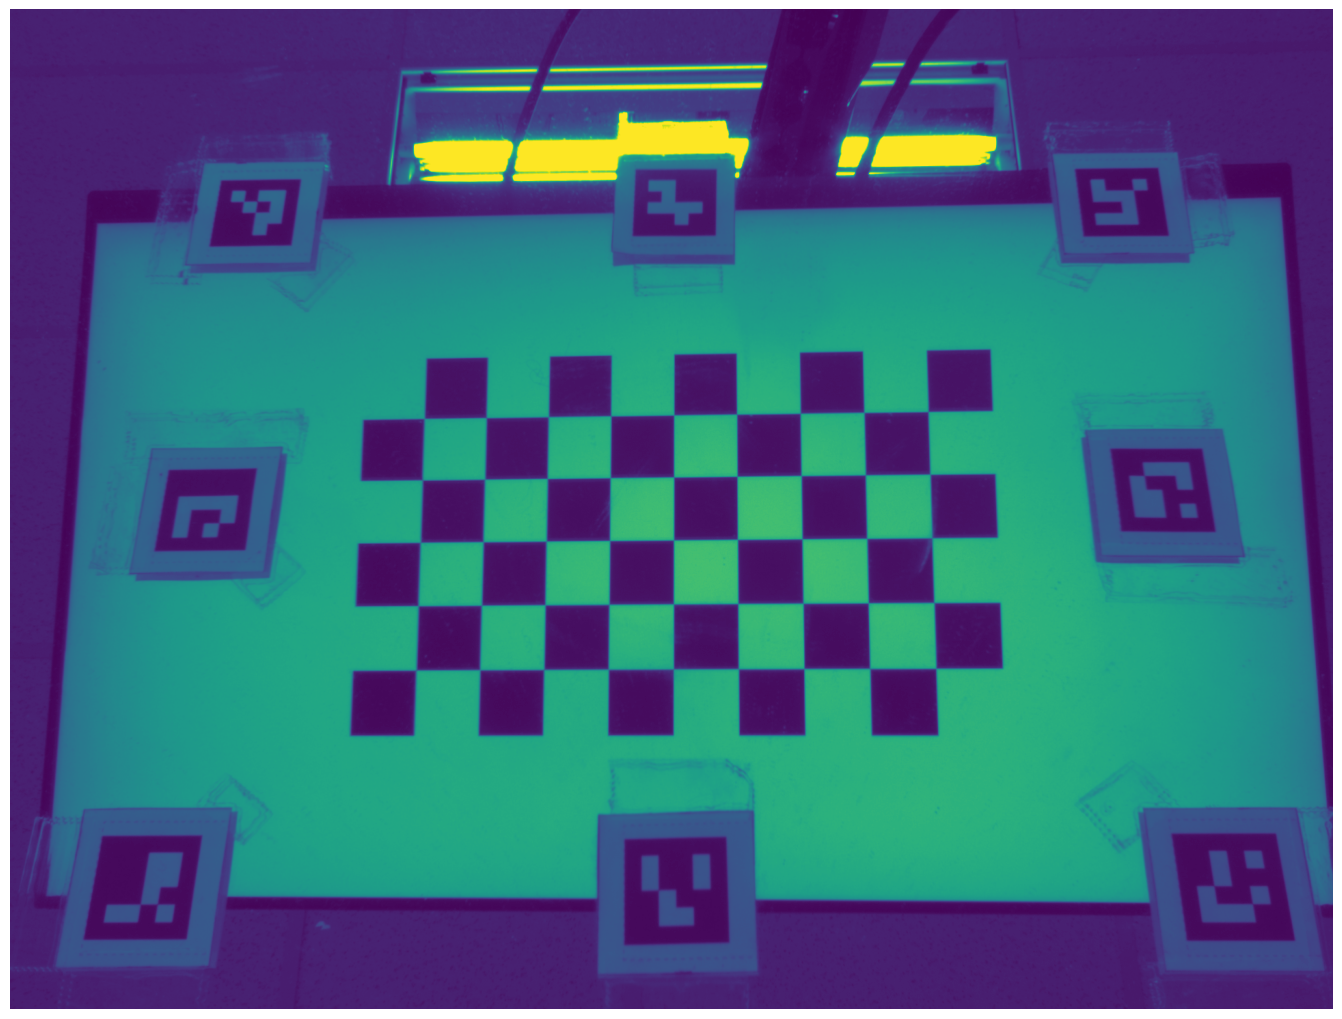

(1464, 1936)


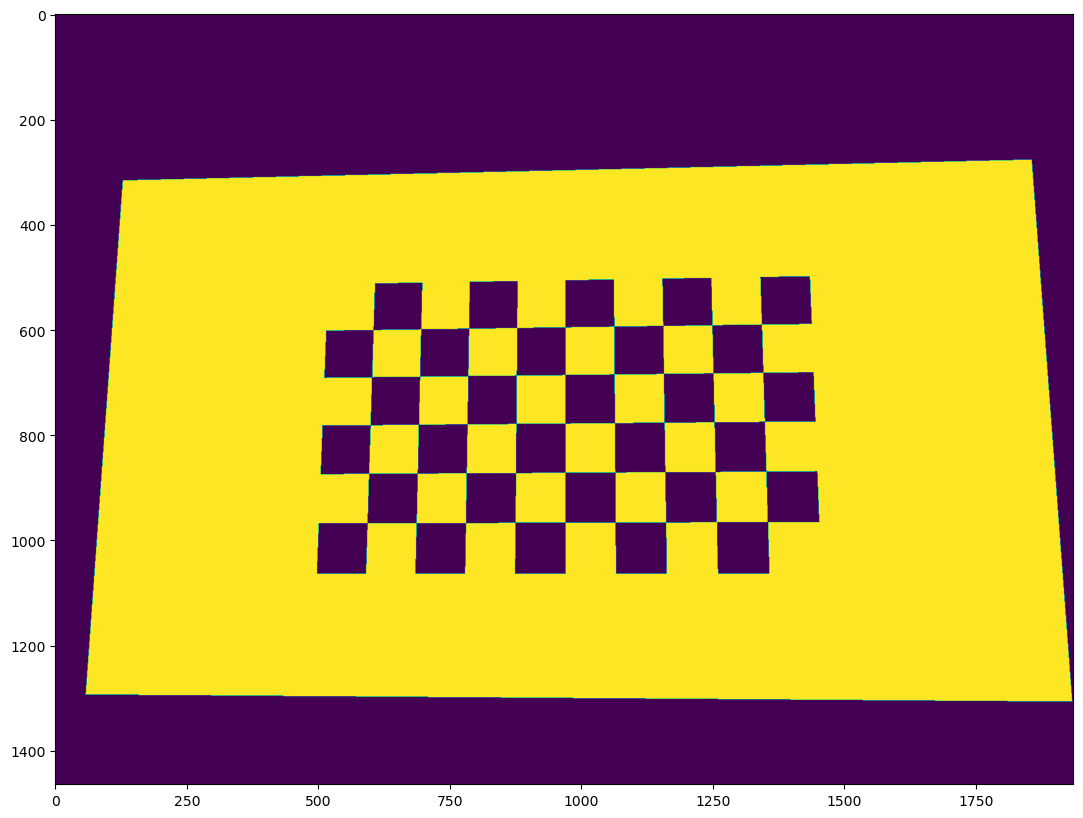

Rep Error: 1.5815698


<Figure size 1500x1000 with 0 Axes>

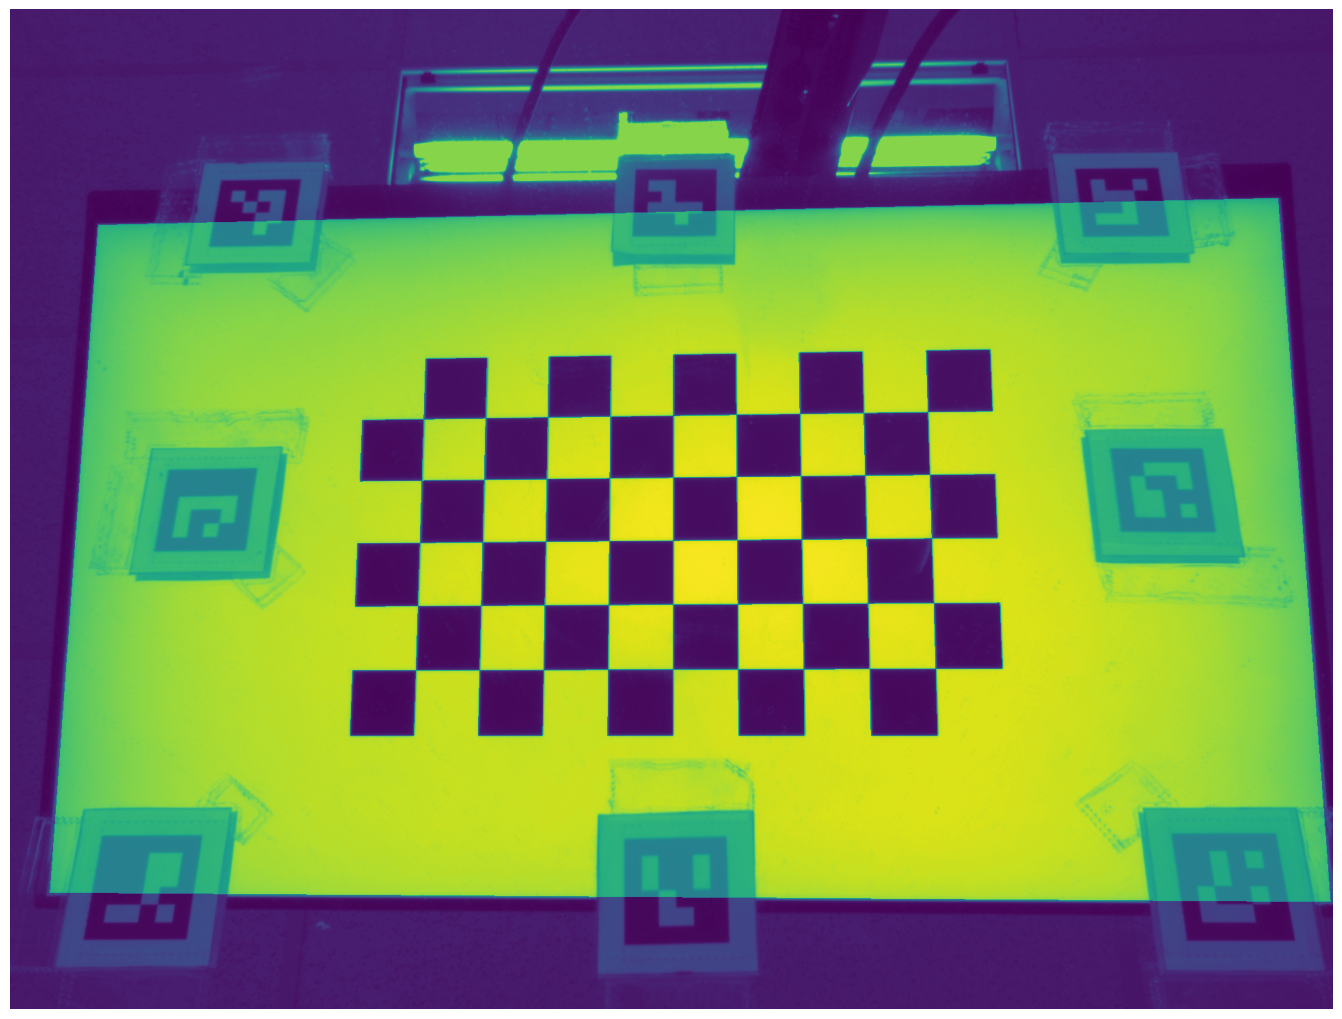

In [7]:
# geometric calibration validation (original, reprojected, comparison)
geo_calib_validation(geoCalibImgUndistortFile, displayintersect, displayScaleFactor, checker_col_row)

## 6. Phase Measuring Deflectometry

In [8]:
# undistort images
obj_folder = './data/convex/'
all_periods = glob.glob(os.path.join(obj_folder, 'period_*'))
for sub_folder in all_periods:
    intrinsic_calib.undistort(imgFolder=sub_folder, imgPattern="*.tif") # undistort other imgs based on intrinsic calibration

100%|██████████| 8/8 [00:02<00:00,  3.93it/s]


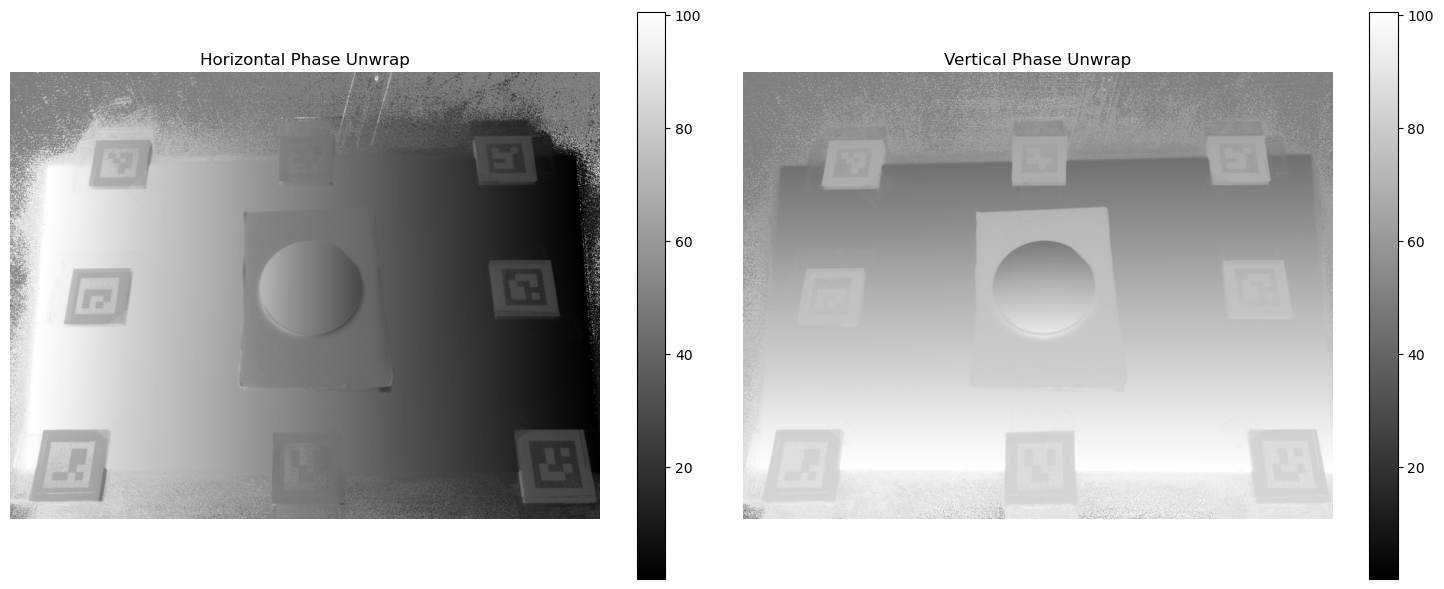

[[[ 2.71088848e+00 -3.75677211e-02 -7.93846588e-02]]

 [[ 2.67161704e+00 -3.77951445e-03  9.82703518e-04]]

 [[ 2.70148592e+00 -5.12800287e-05 -1.64991901e-02]]

 [[ 2.69039716e+00 -7.31679664e-03 -4.86354042e-02]]

 [[ 2.68939247e+00  6.53046557e-03 -5.77519081e-02]]

 [[ 2.68726081e+00 -2.79196148e-03 -3.24752914e-02]]

 [[ 2.70188687e+00 -1.52096491e-03 -5.10365263e-02]]

 [[ 2.69731203e+00  2.09228185e-02 -5.71549689e-02]]]


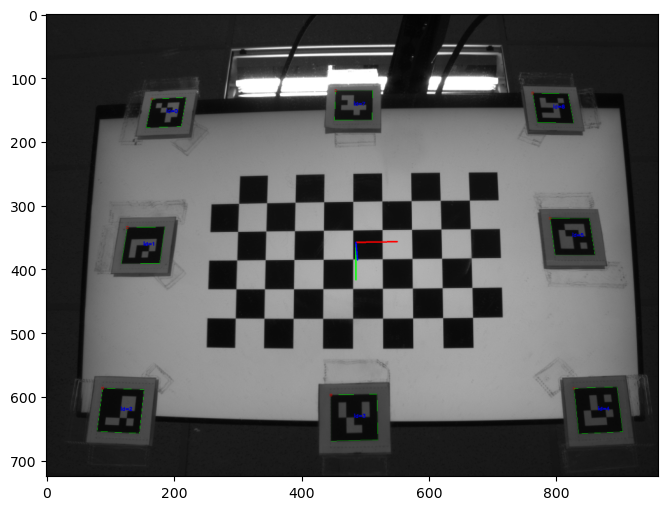

normal map generated.
0.23499992010694287
0.18999990009382722


In [9]:
# final PMD surface reconstruction part. This will generate normal file.
addImgPath = './data/capture_geometric/checker.tif'
normalFolder = './data/convex/period_16/normal_result/'
# half length and half height of reconstructed object. Also need to substract 0.005
half_length_obj = 0.245 / 2 -0.005 # 24.5cm
half_height_obj = 0.20 / 2 -0.005 # 20cm
marker_size = 0.02
normal_mat_trans, normal_mat_origin, normalmap_world = PhaseMeasuringDeflectometry(addImgPath= addImgPath, \
                                                                                    metric_factor= displayScaleFactor, cameraMatrix=intrinsic_calib.cameraMatrix, disCoeffs=intrinsic_calib.distortionCoeff, \
                                                                                    ret=intrinsic_calib.ret, rc2s= rc2s, tc2s= tc2s, \
                                                                                    half_length= half_length_obj, half_height= half_height_obj, marker_size= marker_size,\
                                                                                    resolution=resolution, obj_folder=obj_folder)
# result images are saved in 'CapturedImagessequenceImages/results'

In [10]:
# curvature calculation and save gradient image
# normal_rgb_to_curvature(normal_mat_trans, normalFolder)

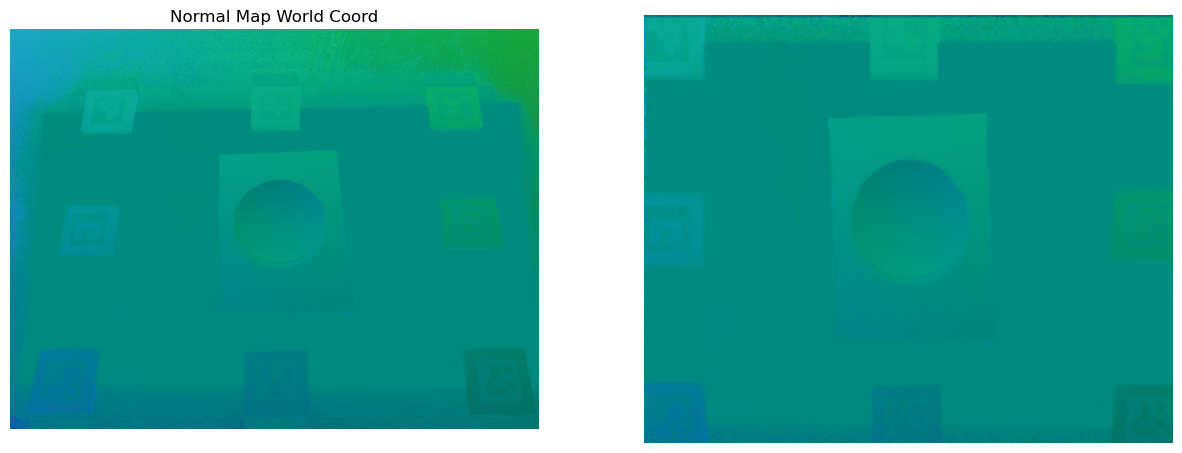

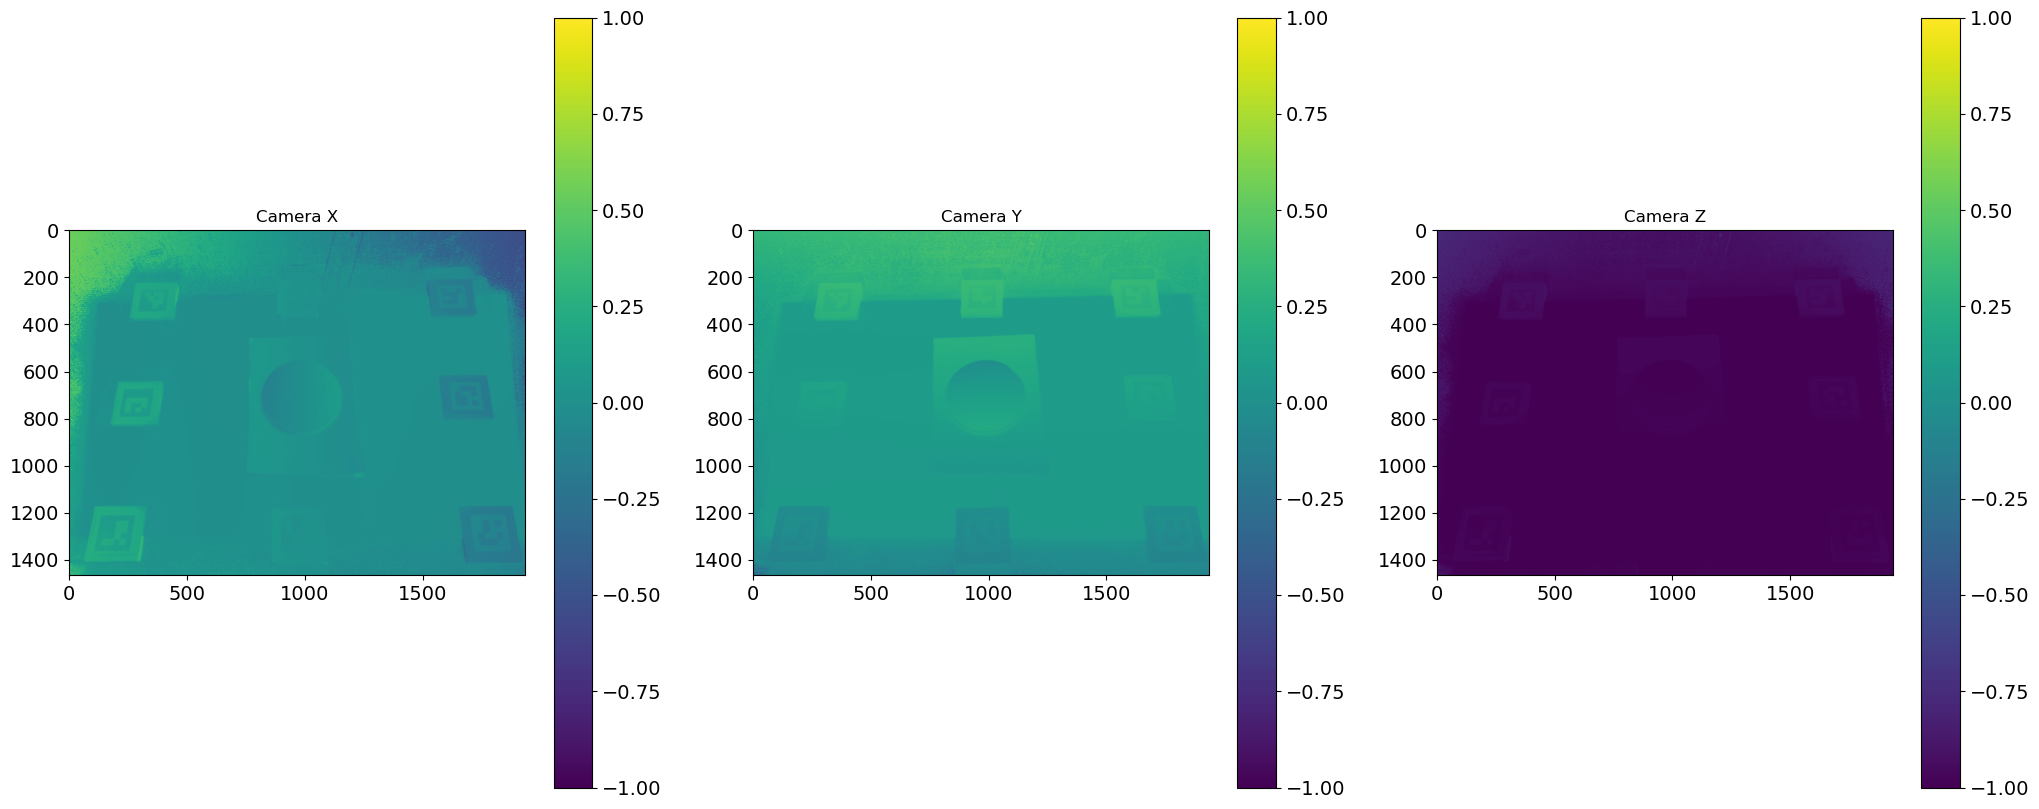

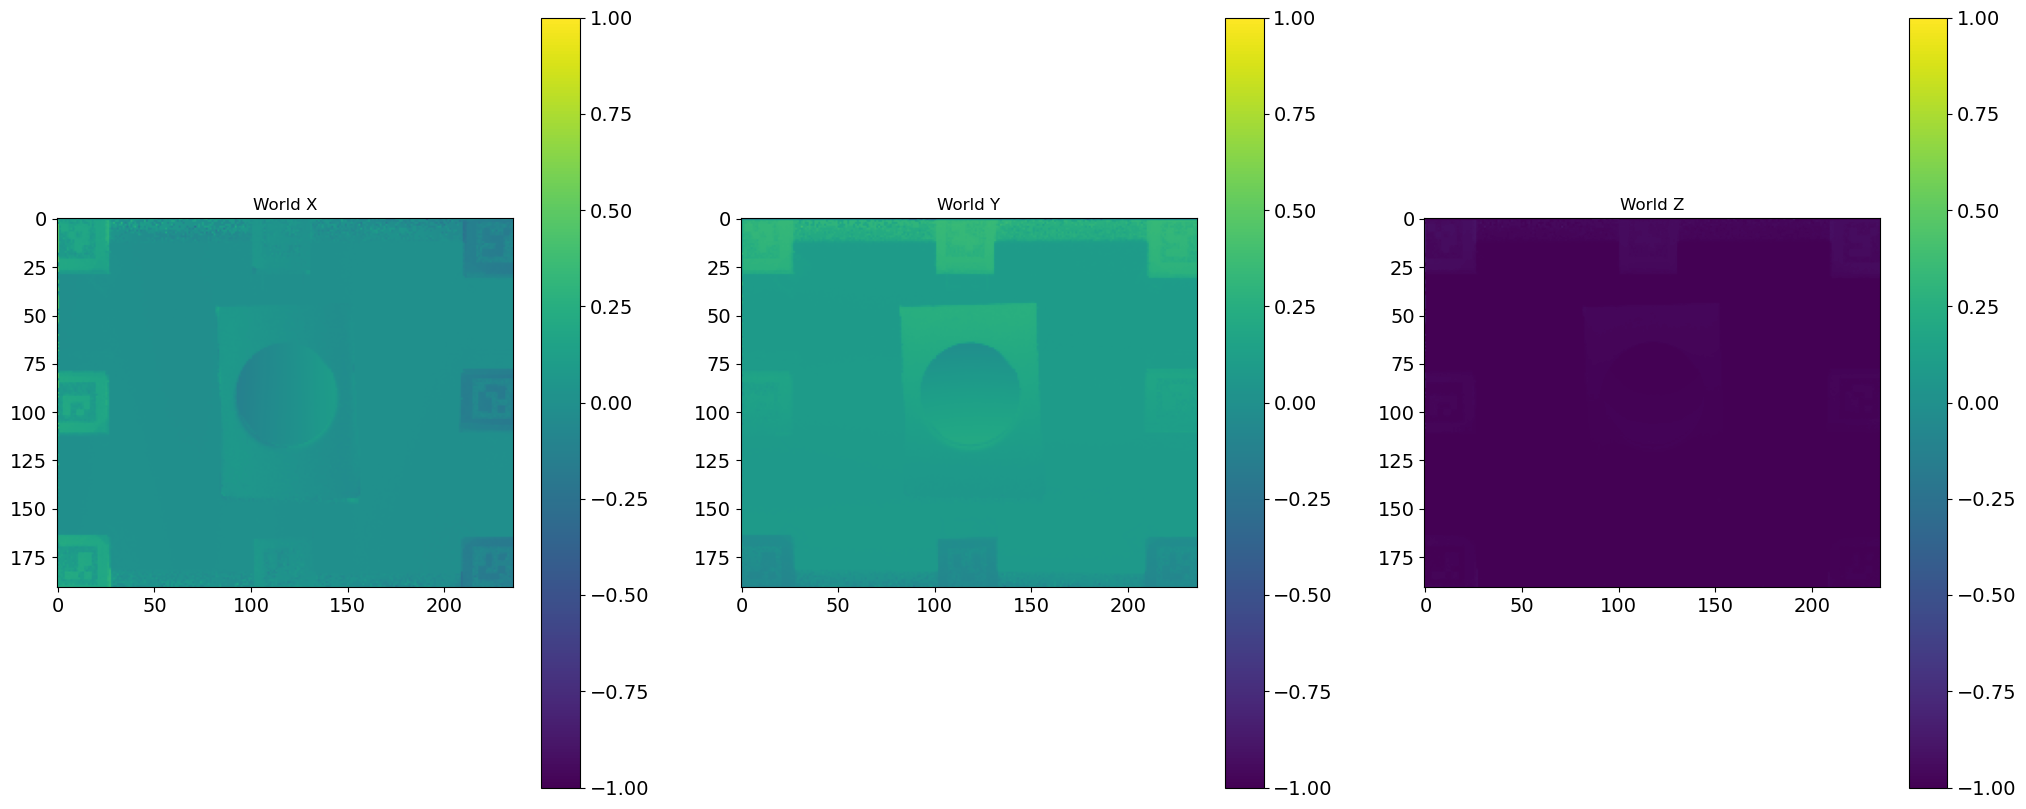

In [11]:
normal2RGB(normal_mat_origin, normalmap_world, normalFolder)